In [90]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import json

In [91]:
# read train data
with open('/elice/data/train_data.json') as fp:
    json_str = fp.read()
    json_data = json.loads(json_str)
    
with open('/elice/data/grading.input.txt') as fp:
    sbm_in = fp.read()
    sbm_in = sbm_in.splitlines()
    
train_df = pd.DataFrame(json_data, columns=['date','name','open','close','high','low','vol'])

In [92]:
json_data[0]

['2016-01-05', 'teller', 123.677, 125.591, 122.459, 126.181, 2163918]

In [254]:
lst = []
rst = []
for idx, name in enumerate(sbm_in):
    dates = train_df[train_df['name'] == name]['date']
    dates = dates.map(lambda x : int(''.join(x.split('-'))))
    prices = train_df[train_df['name'] == name]['close']

    prices = np.reshape(prices[:-1],[-1,1]) ## 수정
    dates = np.reshape(dates[:-1],[-1,1])

    lst.append(SVR(kernel='rbf',C=10).fit(dates,prices))
    

    pred = float(lst[idx].predict(20161229)) ## 수정
    
    if pred > prices[-1]:
        row = '+'
    else: 
        row = '-'
    
    row += ' ' + str(pred)
    rst.append(row)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [255]:
# valid 채점용 데이터
with open('price_rst.txt') as fp:
    price_rst = fp.read()
    price_rst = price_rst.splitlines()

In [256]:
# validation 을 위한 161229 close
price_rst =[]
for i in range(501)[:]:
    before_price = float(train_df[['close']][train_df['name'] ==sbm_in[i]].iloc[-2])
    true_price = float(train_df[['close']][train_df['name'] ==sbm_in[i]].iloc[-1])
    
    if true_price > before_price:
        val = '+'
    else:
        val = '-'
        
    val += ' '+ str(true_price)
    price_rst.append(val)

In [257]:
for i in range(len(rst)):
    rst[i] = rst[i].split(' ')
    
for i in range(len(price_rst)):
    price_rst[i] = price_rst[i].split(' ')

valid_df = pd.concat([pd.DataFrame(rst), pd.DataFrame(price_rst)], axis=1)
valid_df.columns =['pred_0','pred_1','true_0','true_1']

valid_df['s2_1'] = 5-(valid_df['pred_1'].map(float) - valid_df['true_1'].map(float))**2
valid_df['s2'] = valid_df['s2_1'].map(lambda x: 0 if x <= 0 else x)

valid_df['s1'] = valid_df['pred_0'] == valid_df['true_0']
valid_df['s1'] = valid_df['s1'].map(lambda x: 5 if x == True else 0)

valid_df['score'] = valid_df['s1']+valid_df['s2']

In [258]:
10*valid_df['score'].sum()/len(valid_df)

25.922606118514551

In [ ]:
#le3 -> 25.

In [241]:
valid_df.iloc[500]

pred_0                     -
pred_1    52.151088192482234
true_0                     +
true_1                54.111
s1                         0
s2                   1.15875
s2_1                 1.15875
score                1.15875
Name: 500, dtype: object

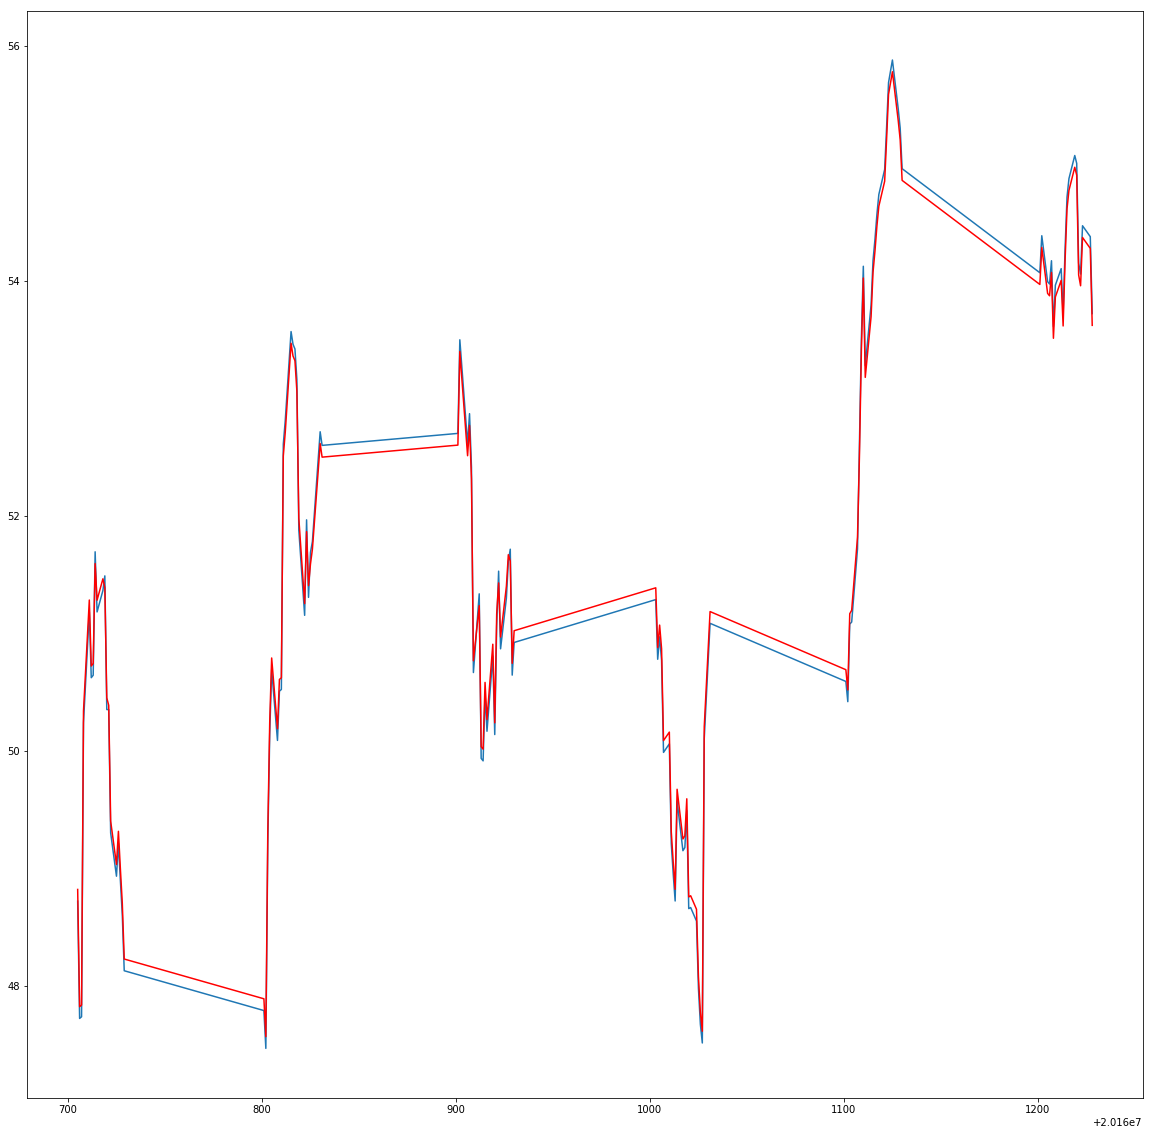

In [248]:
plt.figure(figsize=[20,20])
plt.plot(dates, prices)
plt.plot(dates, lst[500].predict(dates), c='r')
plt.show()

In [82]:
# submission

output_file = 'submission.txt'

with open(output_file, 'w') as fp:
    for _test_pred in rst:
        fp.write(_test_pred)
        fp.write('\n')

In [83]:
import elice_challenge as ec

In [84]:
ec.upload()

이전에 업로드 된 파일 삭제 중...

두 종류의 파일들을 제출해야 합니다.
 - submission.txt : grading.input.json 에 해당하는 출력값
 - submission.ipynb 혹은 submission.py : submission.txt를 재현가능한 소스 코드
제출할 파일들은 comma (,) 로 나누어 써서 제출할 수 있습니다.
제출 예제) submission.ipynb,submission.txt,additional_data.json

> submission.txt
submission.txt 체크 중...
submission.txt: 10145 bytes
업로드 중: submission.txt
업로드가 완료되었습니다.
submit() 으로 점수를 확인할 수 있습니다.


In [85]:
ec.submit()

submission 데이터 개수 = 501
답안 데이터 개수 = 501
Avg. s1 + s2: 3.39929
Score: 33 pts.
33
Score: 33
